In [85]:
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D
from ikpy import plot_utils
import matplotlib.pyplot as plt


from ikpy.chain import Chain
from ikpy.link import OriginLink, URDFLink
import numpy as np

In [86]:
xo=[0.57735027,  0.57735027, -0.57735027]
xn=[0.85048798, -0.39720923,  0.34481157]

In [89]:
chain = Chain(name='arm', links=[
    #OriginLink(),
    URDFLink(
      name="shoulder1",
      translation_vector=[0, 0, 0],
      orientation=[0, 0, 0],
      rotation=[2, 1, 1],
      bounds=(-60, 85),
    ),
    URDFLink(
      name="shoulder2",
      translation_vector=[0, 0, 0],
      orientation=[0, 0, 0],
      rotation=[0, 1, 1],
      bounds=(-60, 85),
    ),
     URDFLink(
      name="hand",
      translation_vector= xo,
      orientation=[0, 0, 0],
      rotation=[0, 0, 0],
    )
])

In [95]:
real_bounds = [link.bounds for link in chain.links]
real_bounds = chain.active_from_full(real_bounds)
print(real_bounds)

[[-60 85]
 [-60 85]
 [None None]]


In [106]:
chain.forward_kinematics([0,1,0])

array([[ 0.54030231, -0.84147098,  0.84147098, -0.65970332],
       [ 0.84147098,  1.        ,  0.45969769,  0.79776718],
       [-0.84147098,  0.45969769,  1.        , -0.79776718],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

Inverse kinematic optimisation OK, done in 9 iterations
[ -0.82572348 -78.84137711   0.        ]
Inverse kinematic optimisation OK, done in 9 iterations


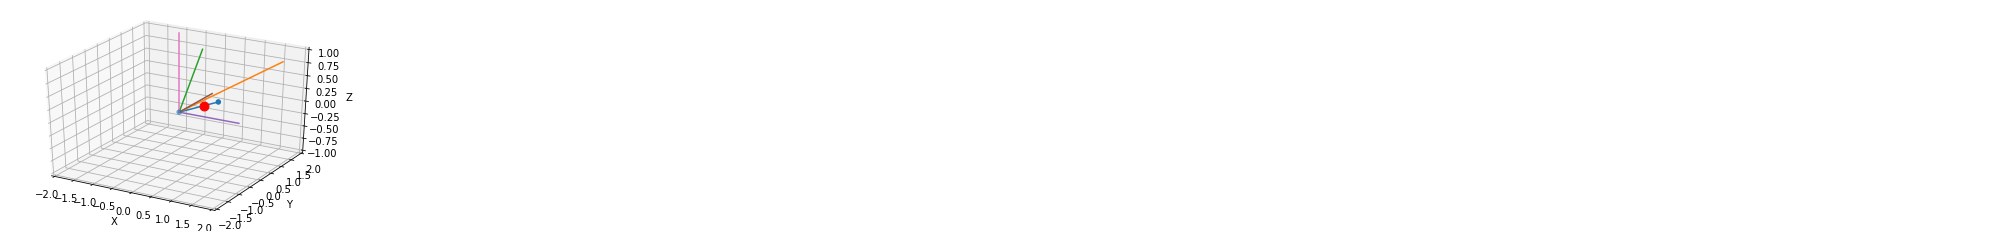

In [94]:
ax = plot_utils.init_3d_figure()

target_vector = xn
target_frame = np.eye(4)
target_frame[:3, 3] = target_vector
angles = chain.inverse_kinematics(target_frame)
print(np.rad2deg(angles))
chain.plot(chain.inverse_kinematics(target_frame), ax, target_vector)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

matplotlib.pyplot.show()

In [80]:
xo=[ 0, 0, 0, 0.57735027,  0.57735027, -0.57735027]
xn=[ 0, 0, 0, 0.85048798, -0.39720923,  0.34481157]
a1=[ 0, 0, 0, 2,-1,1]
a2=[ 0, 0, 0, 0,1,1]

(-1, 1)

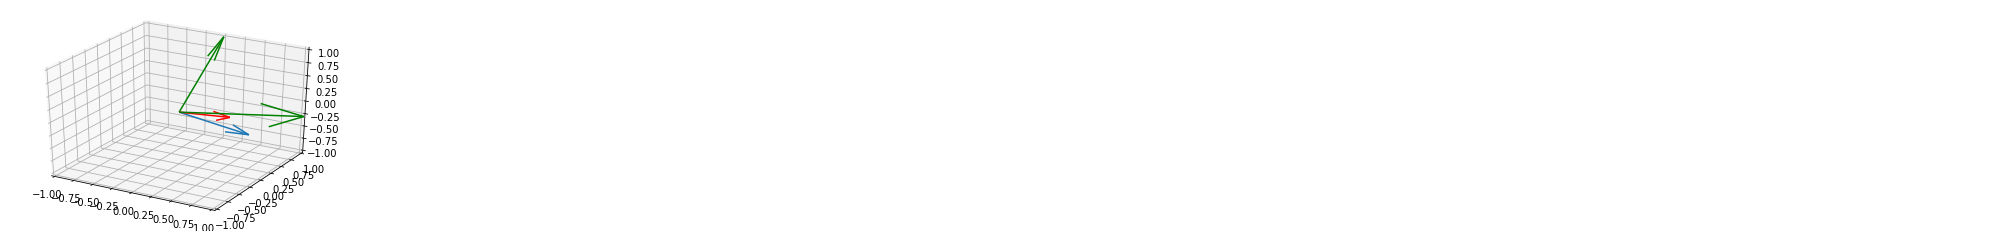

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(*xo)
ax.quiver(*xn,color='red')
ax.quiver(*a1,color='g')
ax.quiver(*a2,color='g')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)


In [20]:
plt.show()